In [3]:
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = "arial"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def load_and_restructure_raw_data(path):
    raw_data = pd.read_table(path, header = None, skiprows = 42)
    raw_data.drop(columns = 1, inplace = True)
    raw_data.columns = raw_data.iloc[0]
    raw_data = raw_data.iloc[1:]
    raw_data["Value (mAU)"] = raw_data["Value (mAU)"].str.replace(",", "")
    raw_data = raw_data.astype(float)
    raw_data["samples"] = path
    raw_data["samples"] = raw_data["samples"].str.replace(".txt", "")
    return raw_data

def rename_samples(samples):
    samples = [sample.replace("pyr_std_500uM.txt", "0.5 mM pyruvate") for sample in samples]
    samples = [sample.replace("pyr_std_1mM.txt", "1 mM pyruvate") for sample in samples]
    samples = [sample.replace("pyr_std_5mM.txt", "5 mM pyruvate") for sample in samples]
    samples = [sample.replace("pyr_std_10mM.txt", "10 mM pyruvate") for sample in samples]
    samples = [sample.replace("pyr_std_20mM.txt", "20 mM pyruvate") for sample in samples]
    samples = [sample.replace("medium_wo_cells_batch1.txt", "R1") for sample in samples]
    samples = [sample.replace("medium_wo_cells_batch2.txt", "R2") for sample in samples]
    samples = [sample.replace("fbp_anc_R1.txt", "R1") for sample in samples]
    samples = [sample.replace("fbp_anc_R2.txt", "R2") for sample in samples]
    samples = [sample.replace("fbp_anc_R3.txt", "R3") for sample in samples]
    samples = [sample.replace("fbp_anc_R4.txt", "R4") for sample in samples]
    samples = [sample.replace("fbp_anc_R5.txt", "R5") for sample in samples]
    samples = [sample.replace("tpiA_anc_R1.txt", "R1") for sample in samples]
    samples = [sample.replace("tpiA_anc_R2.txt", "R2") for sample in samples]
    samples = [sample.replace("tpiA_anc_R3.txt", "R3") for sample in samples]
    samples = [sample.replace("tpiA_anc_R4.txt", "R4") for sample in samples]
    samples = [sample.replace("fbp_evo_R1.txt", "R1") for sample in samples]
    samples = [sample.replace("fbp_evo_R2.txt", "R2") for sample in samples]
    samples = [sample.replace("fbp_evo_R3.txt", "R3") for sample in samples]
    samples = [sample.replace("fbp_evo_R4.txt", "R4") for sample in samples]
    samples = [sample.replace("fbp_evo_R5.txt", "R5") for sample in samples]
    samples = [sample.replace("tpiA_evo_R1.txt", "R1") for sample in samples]
    samples = [sample.replace("tpiA_evo_R2.txt", "R2") for sample in samples]
    samples = [sample.replace("tpiA_evo_R3.txt", "R3") for sample in samples]
    samples = [sample.replace("tpiA_evo_R4.txt", "R4") for sample in samples]
    return samples

def plot_batch(batch, ax):
    chromatograms = pd.DataFrame()
    for path in batch:
        chromatogram = load_and_restructure_raw_data(path)
        chromatograms = chromatograms.append(chromatogram)
    plot = sns.lineplot(x = "Time (min)",
                 y = "Value (mAU)",
                 hue = "samples",
                 data = chromatograms,
                 ax = ax)
    
    batch = rename_samples(batch)
    
    legend = batch
    for i in range (len(legend)):
        legend[i] = legend[i].replace(".txt", "")
    
    plot.legend(legend, fontsize = "x-large")
    
    return plot


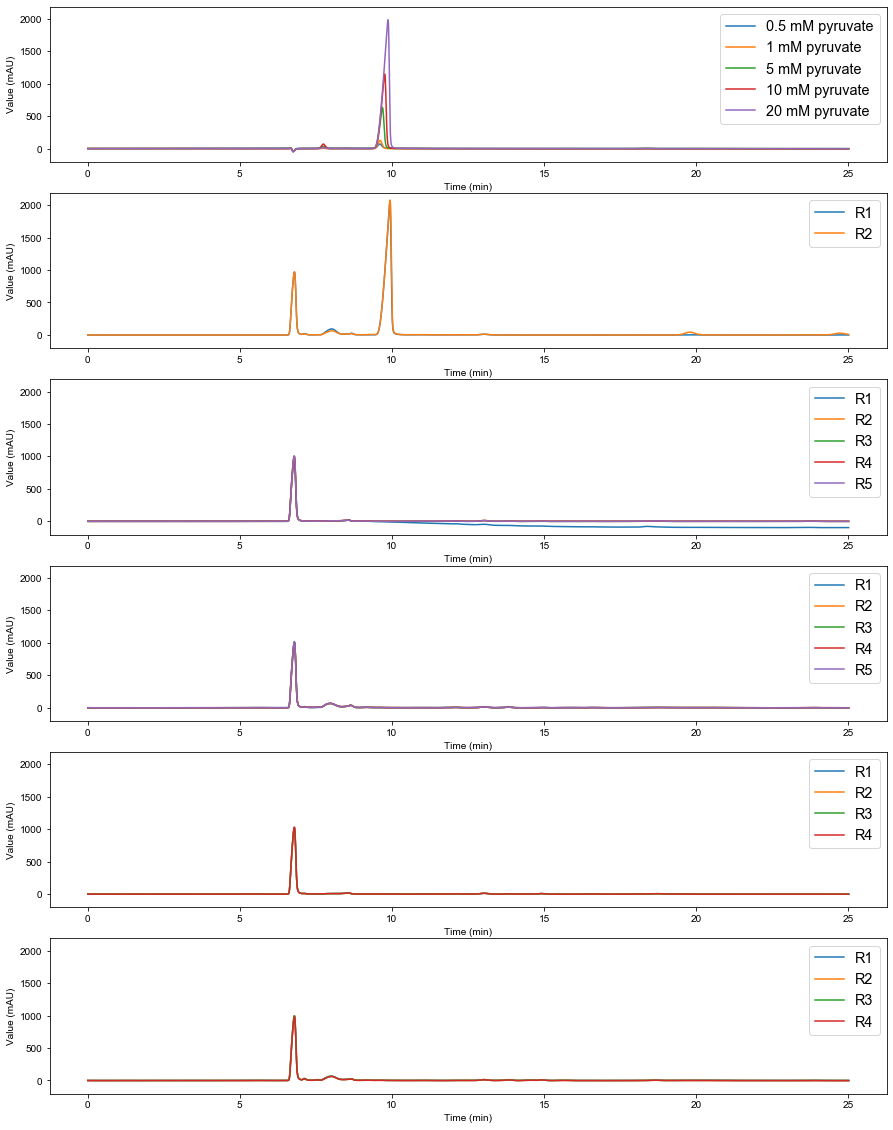

In [4]:
batches = (
          ["pyr_std_500uM.txt",
          "pyr_std_1mM.txt",
          "pyr_std_5mM.txt",
          "pyr_std_10mM.txt",
          "pyr_std_20mM.txt"],
          ["medium_wo_cells_batch1.txt",
          "medium_wo_cells_batch2.txt"],
          ["fbp_anc_R1.txt",
          "fbp_anc_R2.txt",
          "fbp_anc_R3.txt",
          "fbp_anc_R4.txt",
          "fbp_anc_R5.txt"],
          ["fbp_evo_R1.txt",
          "fbp_evo_R2.txt",
          "fbp_evo_R3.txt",
          "fbp_evo_R4.txt",
          "fbp_evo_R5.txt"],
          ["tpiA_anc_R1.txt",
          "tpiA_anc_R2.txt",
          "tpiA_anc_R3.txt",
          "tpiA_anc_R4.txt"],
         ["tpiA_evo_R1.txt",
          "tpiA_evo_R2.txt",
          "tpiA_evo_R3.txt",
          "tpiA_evo_R4.txt"]    
           )

fig, axes = plt.subplots(
    nrows=6, ncols=1, sharey = True, figsize = (15,20)
)

for i in range (len(batches)):
    axes[i] = plot_batch(batches[i], axes[i])

fig.savefig("supplementary_figure_5.pdf")
